# Prática 3 - Modelando assuntos

In [1]:
from gensim import corpora, models, similarities
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from string import punctuation
from pprint import pprint

## Definindo um problema

A epidemia de Zika gerou uma epidemia de publicações científicas sobre o assunto. Como é uma doença pouco conhecida, pesquisas em diversas áreas do conhecimento precisam ser conduzidas para poder preencher a lacuna da nossa ignorância.

Neste exercício vamos analizar um corpus de resumos de artigos publicados sobre o assunto e tentar modelar os assuntos existentes.

In [3]:
dicionario = corpora.Dictionary.load('Dicionario_zika.dict')
corpus = corpora.MmCorpus('corpus_zika')

In [4]:
print(dicionario)
print(corpus)
498*5886

Dictionary(5886 unique tokens: ['Ã', 'pathophysiology', 'northeast', '.)', 'Spillover']...)
MmCorpus(498 documents, 5886 features, 24027 non-zero entries)


2931228

In [5]:
print(dicionario[35])
for doc in corpus[:3]:
    print(doc)

We
[(0, 2.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 3.0), (6, 1.0), (7, 2.0), (8, 3.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 2.0), (13, 1.0), (14, 1.0), (15, 1.0), (16, 2.0), (17, 1.0), (18, 2.0), (19, 1.0), (20, 1.0), (21, 1.0), (22, 1.0), (23, 1.0), (24, 1.0), (25, 2.0), (26, 1.0), (27, 1.0), (28, 1.0), (29, 1.0), (30, 2.0), (31, 1.0), (32, 2.0), (33, 1.0), (34, 1.0), (35, 2.0), (36, 1.0), (37, 3.0), (38, 3.0), (39, 1.0), (40, 3.0), (41, 1.0), (42, 1.0), (43, 2.0), (44, 1.0), (45, 2.0), (46, 3.0), (47, 3.0), (48, 5.0), (49, 1.0), (50, 1.0), (51, 2.0), (52, 2.0), (53, 1.0), (54, 1.0), (55, 1.0), (56, 1.0), (57, 1.0), (58, 1.0), (59, 1.0), (60, 1.0), (61, 1.0), (62, 2.0), (63, 1.0), (64, 1.0), (65, 1.0), (66, 1.0), (67, 3.0), (68, 3.0), (69, 1.0), (70, 2.0), (71, 1.0), (72, 1.0), (73, 1.0), (74, 1.0), (75, 1.0), (76, 2.0), (77, 1.0), (78, 5.0), (79, 1.0), (80, 1.0), (81, 1.0), (82, 1.0), (83, 12.0), (84, 1.0), (85, 1.0), (86, 1.0), (87, 1.0), (88, 1.0), (89, 2.0), (90, 2.0), (91,

In [15]:
bow  = [dicionario[tok]for tok,freq in corpus[10]]
bow

['virus',
 "['",
 'assays',
 'pregnancy',
 'Zika',
 'infection',
 'including',
 'disease',
 ".']",
 'microcephaly',
 'fever',
 'ZIKV',
 'term',
 'pregnant',
 'manifestations',
 'clinical',
 'patients',
 'symptoms',
 'women',
 'low',
 'data',
 'Although',
 'may',
 'transmission',
 'mosquito',
 'cross',
 'sexual',
 'reactivity',
 'suspected',
 'America',
 'dengue',
 'infections',
 'risk',
 'potential',
 'diagnosis',
 'case',
 'aspects',
 'In',
 'Central',
 'link',
 'North',
 'spread',
 'Aedes',
 'currently',
 'rapid',
 'Americas',
 'autochthonous',
 'diagnostic',
 'regions',
 'report',
 'available',
 'Given',
 'addition',
 'travellers',
 'returning',
 'emergence',
 'informed',
 'chikungunya',
 'presentation',
 'differential',
 'male',
 ')"',
 'ongoing',
 'ZF',
 'climates',
 'infested',
 'afebrile',
 'Against',
 'consecutive',
 'Europe',
 'frequent',
 'background',
 'favour',
 'ZVD',
 'considered',
 'traveller',
 'mode',
 'missed',
 'easily',
 'subfebril',
 'advised',
 'propose',
 'signif

In [16]:
len(bow)==len(set(bow))

True

## Latent Semantic Indexing - LSI

$tfidf_{t,d} = \frac{tf}{df}$ onde tf é a frequência do token $t$ em um dado documento $d$, e o IDF ($1/df$) é inverso da frequência de documentos que contém o termo $t$

In [17]:
tfidf = models.TfidfModel(corpus) # Calcula o tfidf de cada par termo-documento
corpus_tfidf = tfidf[corpus]

In [21]:
import pandas as pd
import seaborn as sns
from collections import OrderedDict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=10) # parametrizando o modelo LSI
corpus_lsi = lsi[corpus_tfidf]  # Calcula o SVD ou LSI para o corpus em dimensão 10

In [40]:
data = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(10)}
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
ZIKV,0.341580,0.514837,0.337653,0.273697,NaN,0.148165,0.196007,NaN,0.135781,NaN
virus,0.258976,-0.189086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zika,0.191976,-0.175870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
infection,0.151446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,0.120774,-0.166315,NaN,NaN,0.177451,NaN,0.116973,NaN,NaN,NaN
microcephaly,0.117210,NaN,0.109919,NaN,-0.159379,0.159644,-0.156203,NaN,NaN,NaN
Brazil,0.113079,NaN,NaN,NaN,-0.125303,NaN,-0.169776,NaN,NaN,-0.120859
The,0.112253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cases,0.111630,NaN,NaN,NaN,-0.134550,NaN,-0.122118,NaN,NaN,NaN
disease,0.102680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print(lsi.show_topic(9,4))
OrderedDict(lsi.show_topic(0,4))

[('YF', 0.3913478255646667), ('Ae', 0.15555480821898637), ('viruses', -0.13995308043586305), ('saliva', 0.13196113501894802)]


OrderedDict([('ZIKV', 0.34158007081614783),
             ('virus', 0.2589762969849745),
             ('Zika', 0.1919756530502725),
             ('infection', 0.1514455411802534)])

In [42]:
df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(57, 10)


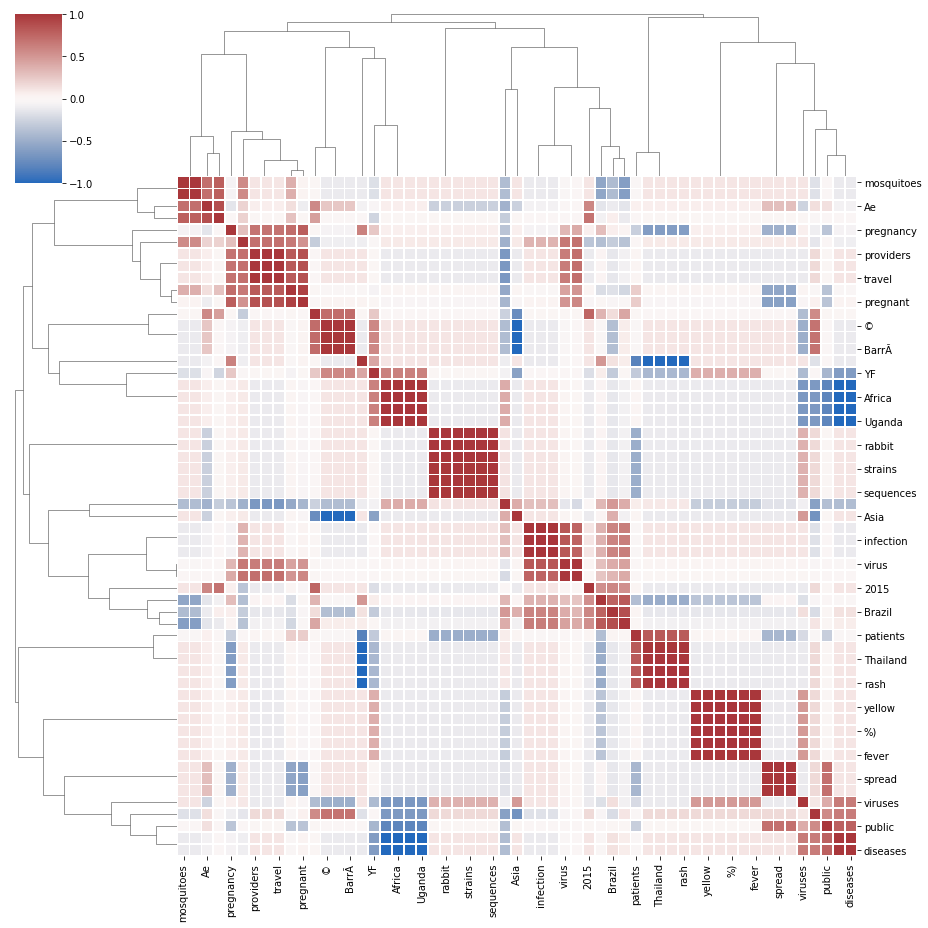

In [43]:
sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

Depois de estimar o modelo, podemos olhar os 30 assuntos, listando apenas as 4 palavras mais importantes.

In [34]:
lsi.show_topics(10,5)

[(0,
  '0.342*"ZIKV" + 0.259*"virus" + 0.192*"Zika" + 0.151*"infection" + 0.121*"transmission"'),
 (1,
  '0.515*"ZIKV" + -0.240*"women" + -0.189*"virus" + -0.179*"pregnant" + -0.176*"Zika"'),
 (2,
  '0.338*"ZIKV" + -0.250*"YF" + -0.200*"antibodies" + -0.193*"antibody" + -0.188*"sera"'),
 (3,
  '0.274*"ZIKV" + 0.170*"women" + -0.135*"spread" + 0.116*"pregnancy" + 0.113*"patients"'),
 (4,
  '0.371*"Ae" + 0.177*"transmission" + -0.159*"microcephaly" + 0.140*"aegypti" + 0.136*"mosquitoes"'),
 (5,
  '0.284*"YF" + -0.201*"patients" + 0.160*"microcephaly" + 0.148*"ZIKV" + 0.146*"pregnancy"'),
 (6,
  '-0.248*"Ae" + 0.196*"ZIKV" + -0.170*"Brazil" + -0.156*"microcephaly" + 0.126*"YF"'),
 (7,
  '-0.408*"YF" + 0.127*"viruses" + 0.114*"public" + 0.112*"blood" + 0.108*"health"'),
 (8,
  '0.160*"Ae" + -0.158*"sequence" + -0.152*"sequences" + 0.136*"ZIKV" + 0.129*"patients"'),
 (9,
  '0.391*"YF" + 0.156*"Ae" + -0.140*"viruses" + 0.132*"saliva" + -0.121*"Brazil"')]

Podemos também olhar para os documentos do nosso corpus como uma combinação linear dos assuntos

In [44]:
for doc  in corpus_lsi:
    print(doc)
    break

[(0, 0.29351896417894835), (1, 0.04667135535709624), (2, 0.05876374497594797), (3, 0.34348964345136274), (4, 0.015785264339811672), (5, 0.09486500074807745), (6, -0.015273479979863707), (7, 0.07165406441542581), (8, 0.03033162329488129), (9, 0.049292120429947996)]


In [45]:
data = {'doc%s'%i: dict(doc) for i,doc in enumerate(corpus_lsi[:20])}
dfdoc = pd.DataFrame(data)
dfdoc = dfdoc.fillna(0)
dfdoc.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19
0,0.293519,0.280316,0.305158,0.333406,0.360375,0.197602,0.211652,0.290785,0.174337,0.276535,0.312201,0.247665,0.252215,0.310209,0.175341,0.211780,0.322444,0.263495,0.210827,0.301363
1,0.046671,0.072039,0.078840,0.237393,0.056309,0.076096,-0.010738,0.000465,0.051706,0.090427,0.025479,0.017770,0.071465,0.056674,-0.025575,0.098802,0.233418,0.060472,0.084483,0.102515
2,0.058764,0.019205,0.203964,0.057635,0.150889,0.108115,0.078852,0.160460,0.008337,0.088540,0.109135,0.024513,0.132908,0.170571,0.021252,-0.155030,0.079985,0.001517,0.054402,0.083261
3,0.343490,-0.099823,0.124410,-0.079075,0.067440,0.041926,0.101168,-0.002227,0.006232,-0.044470,0.124290,0.177000,0.207848,-0.153074,0.172437,0.054548,0.227178,-0.005008,-0.075790,0.161207
4,0.015785,0.030228,-0.054397,0.345427,-0.171340,-0.023613,-0.071123,-0.011221,0.052557,-0.015843,0.067531,-0.072223,-0.095755,-0.132666,-0.088382,0.001057,-0.031744,-0.083596,0.022143,-0.077850


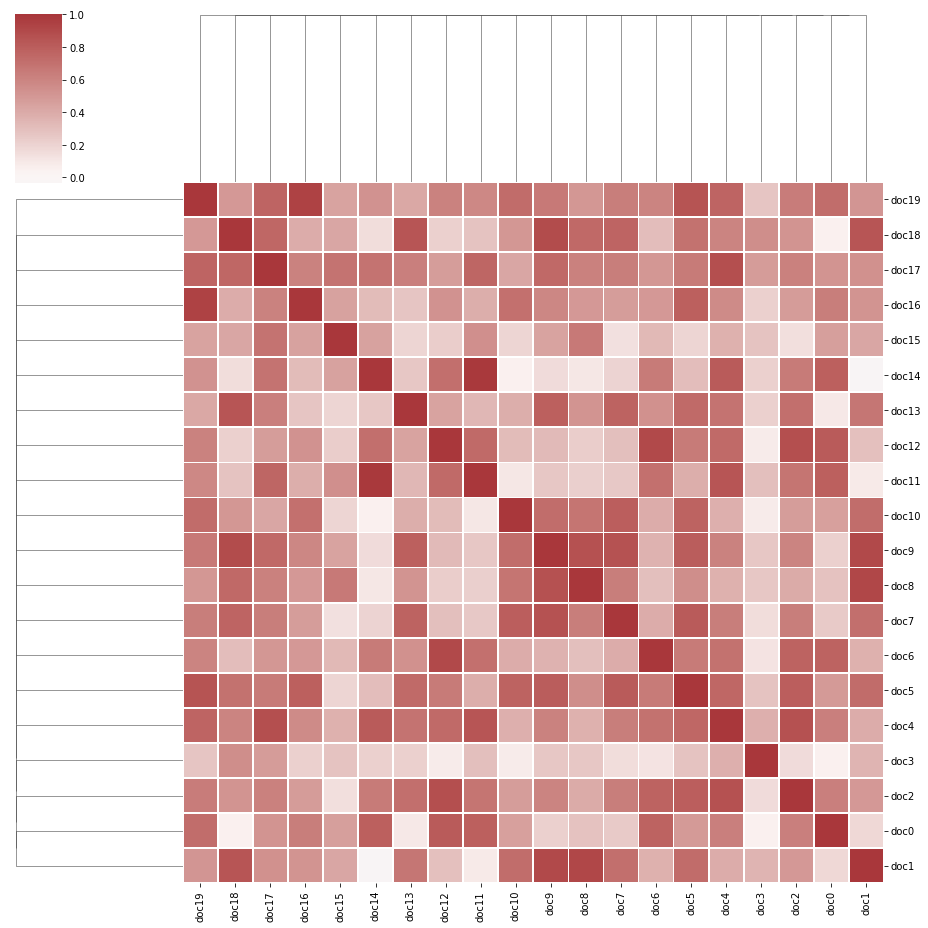

In [46]:
sns.clustermap(dfdoc.corr(), center=0, cmap="vlag", metric='hamming',
               linewidths=.75, figsize=(13, 13));

In [66]:
dfdoc.T.describe()

,0,1,2,3,4,5,6,7,8,9
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.109329,0.001527,-0.012893,0.002318,0.000027,0.002832,0.000310,-0.006457,-0.004438,-0.003866
std,0.123600,0.094665,0.087830,0.076518,0.073733,0.069870,0.068738,0.064839,0.062868,0.062469
min,0.000000,-0.470679,-0.438635,-0.338071,-0.202787,-0.342488,-0.234892,-0.205701,-0.361605,-0.356982
25%,0.000000,0.000000,-0.009995,-0.000423,-0.011972,0.000000,0.000000,-0.025780,-0.003138,-0.015536
50%,0.047621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.203830,0.016140,0.000000,0.010740,0.000000,0.015469,0.011102,0.000000,0.000214,0.000000
max,0.428312,0.301974,0.207669,0.302283,0.409304,0.265928,0.233406,0.379676,0.175709,0.190188


Podemos calcular a similaridade por assunto de um documento com todos os demais documentos do corpus.

In [47]:
index = similarities.MatrixSimilarity(corpus_lsi)

Vamos escolher o primeiro documento do corpus para ser a referência

In [48]:
sims = index[doc]
#pprint(list(enumerate(sims)))
pprint(sorted(list(enumerate(sims)), key=lambda x:x[1], reverse=True))

[(0, 1.0),
 (430, 0.90211874),
 (327, 0.8458273),
 (12, 0.81871295),
 (494, 0.8133699),
 (11, 0.78207606),
 (2, 0.77595055),
 (6, 0.75810635),
 (423, 0.75245845),
 (16, 0.7502743),
 (464, 0.74605894),
 (477, 0.74571437),
 (426, 0.7392249),
 (32, 0.73882884),
 (30, 0.7307666),
 (19, 0.72515607),
 (27, 0.72105473),
 (247, 0.71708196),
 (14, 0.7144637),
 (391, 0.6963562),
 (400, 0.6885672),
 (5, 0.68446726),
 (10, 0.6807093),
 (476, 0.6805724),
 (22, 0.67802775),
 (24, 0.677697),
 (46, 0.6626247),
 (323, 0.655895),
 (493, 0.6526971),
 (39, 0.6318065),
 (401, 0.6257829),
 (332, 0.6254783),
 (31, 0.6222316),
 (383, 0.6161244),
 (26, 0.6054337),
 (4, 0.6003019),
 (402, 0.5958079),
 (28, 0.5851282),
 (174, 0.5787979),
 (42, 0.5740715),
 (428, 0.56547457),
 (118, 0.55990326),
 (453, 0.5595565),
 (487, 0.5595001),
 (8, 0.5544225),
 (357, 0.553857),
 (69, 0.55301946),
 (390, 0.5507367),
 (29, 0.54597443),
 (144, 0.54456466),
 (7, 0.5435324),
 (25, 0.5417317),
 (105, 0.54054767),
 (436, 0.5391268

## Latent Dirichlet Allocation - LDA

O LDA é uma técnica um pouco mais sofisticada que o LSI, que envolve uma interpretação probabilística do que é uma assunto. Para saber mais, veja este artigo: http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

In [77]:
lda_model = models.ldamodel.LdaModel(corpus, id2word=dicionario, num_topics=10, passes=10)

In [78]:
lda_model.show_topics(10)

[(0,
  '0.042*"virus" + 0.039*"Zika" + 0.016*"transmission" + 0.011*"infection" + 0.008*"women" + 0.008*"pregnancy" + 0.007*"[\'" + 0.006*".\']" + 0.006*"pregnant" + 0.005*"disease"'),
 (1,
  '0.020*"ZIKV" + 0.009*"The" + 0.009*"virus" + 0.007*"human" + 0.007*".\'," + 0.006*"1" + 0.006*"cells" + 0.005*"viruses" + 0.005*"infection" + 0.005*"Zika"'),
 (2,
  '0.011*"rabbits" + 0.009*"The" + 0.006*"Aedes" + 0.006*"mosquito" + 0.005*"days" + 0.005*"S" + 0.005*"development" + 0.004*".\']" + 0.004*"[\'" + 0.004*"fattening"'),
 (3,
  '0.015*"YF" + 0.015*"antibodies" + 0.015*"fever" + 0.012*"virus" + 0.011*"sera" + 0.011*"viruses" + 0.010*"antibody" + 0.009*"yellow" + 0.009*"The" + 0.008*"2"'),
 (4,
  '0.030*"virus" + 0.022*"Zika" + 0.021*"ZIKV" + 0.013*"The" + 0.013*"infection" + 0.008*"[\'" + 0.008*".\']" + 0.007*"cases" + 0.007*"outbreak" + 0.007*"dengue"'),
 (5,
  '0.018*"ZIKV" + 0.010*"Zika" + 0.008*"The" + 0.008*"disease" + 0.007*"fever" + 0.007*"PCR" + 0.007*"virus" + 0.007*"rabbit" + 0.

In [79]:
lsi.save?